In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
tf.__version__

'2.0.0'

In [3]:
data = pd.read_csv('Churn_Modelling.csv')

In [4]:
data.shape

(10000, 14)

In [5]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
len(data['RowNumber'].unique()), len(data['CustomerId'].unique())

(10000, 10000)

In [7]:
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)

In [8]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


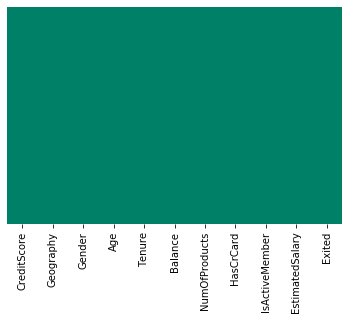

In [9]:
sb.heatmap(data.isna(),
          cbar = False,
          yticklabels = False,
          cmap = 'summer')
plt.show()

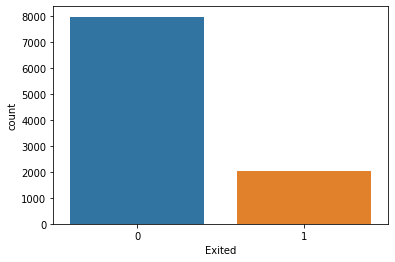

In [10]:
sb.countplot(data['Exited'])
plt.show()

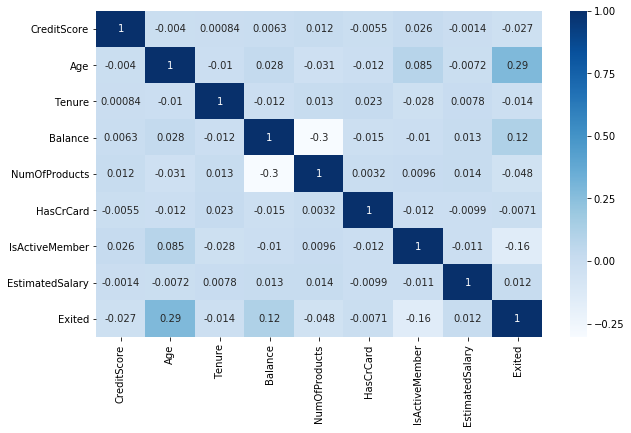

In [11]:
fig, ax = plt.subplots(figsize = (10, 6))

corr = data.corr()
ax = sb.heatmap(corr,
          annot = True,
          cmap = 'Blues')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [12]:
data[data.duplicated()]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


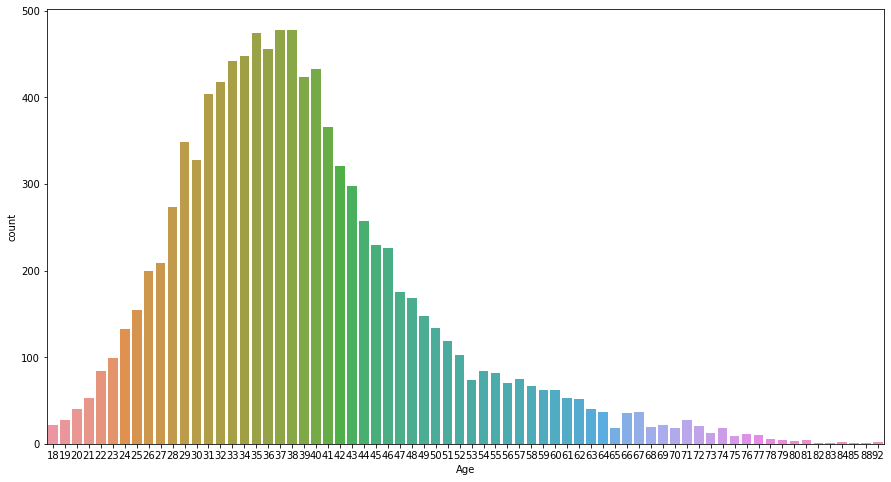

In [13]:
fig, ax = plt.subplots(figsize = (15, 8))

sb.countplot(data['Age'])
plt.show()

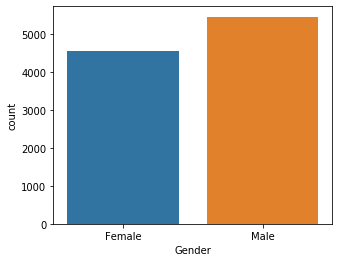

In [14]:
fig, ax = plt.subplots(figsize = (5, 4))

sb.countplot(data['Gender'])
plt.show()

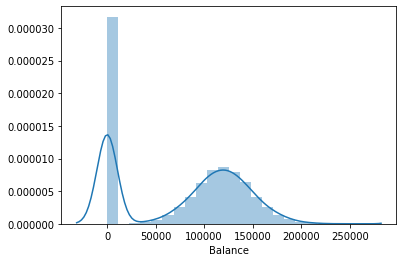

In [15]:
sb.distplot(data['Balance'])
plt.show()

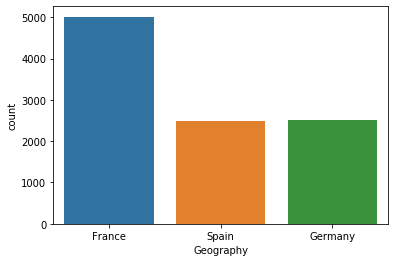

In [16]:
sb.countplot(data['Geography'])
plt.show()

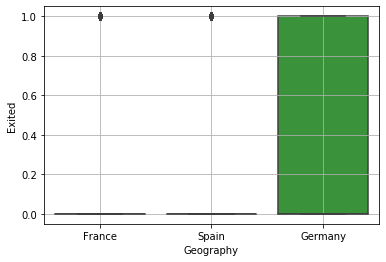

In [17]:
sb.boxplot(x = 'Geography', 
           y = 'Exited', 
           data = data)
plt.grid()
plt.show()

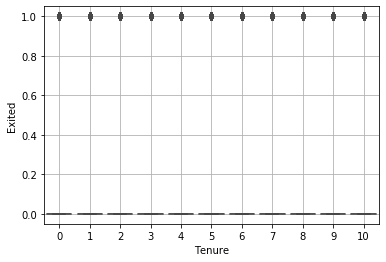

In [18]:
sb.boxplot(x = 'Tenure', 
           y = 'Exited', 
           data = data)
plt.grid()
plt.show()

In [19]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Data Preprocessing

In [20]:
data['Tenure'].unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0])

In [21]:
data['NumOfProducts'].unique()

array([1, 3, 2, 4])

In [22]:
sc = StandardScaler()
data.iloc[:, [0,3,5,9]] = sc.fit_transform(data.iloc[:,[0,3,5,9]])

In [23]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.326221,France,Female,0.293517,2,-1.225848,1,1,1,0.021886,1
1,-0.440036,Spain,Female,0.198164,1,0.117350,1,0,1,0.216534,0
2,-1.536794,France,Female,0.293517,8,1.333053,3,1,0,0.240687,1
3,0.501521,France,Female,0.007457,1,-1.225848,2,0,0,-0.108918,0
4,2.063884,Spain,Female,0.388871,2,0.785728,1,1,1,-0.365276,0


In [24]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1:].values

In [25]:
X.shape, Y.shape

((10000, 10), (10000, 1))

In [26]:
X[1]

array([-0.4400359548576657, 'Spain', 'Female', 0.1981638321954454, 1,
       0.11735002143511059, 1, 0, 1, 0.21653375188734025], dtype=object)

In [27]:
lb = LabelEncoder()
X[:, 1] = lb.fit_transform(X[:, 1])
X[:, 2] = lb.fit_transform(X[:, 2])

In [28]:
X[1]

array([-0.4400359548576657, 2, 0, 0.1981638321954454, 1,
       0.11735002143511059, 1, 0, 1, 0.21653375188734025], dtype=object)

In [29]:
ohe = OneHotEncoder(categorical_features = [1])
X = ohe.fit_transform(X).toarray()

In [30]:
X[1]

array([ 0.        ,  0.        ,  1.        , -0.44003595,  0.        ,
        0.19816383,  1.        ,  0.11735002,  1.        ,  0.        ,
        1.        ,  0.21653375])

In [31]:
X = X[:, 1:]

In [32]:
X[1]

array([ 0.        ,  1.        , -0.44003595,  0.        ,  0.19816383,
        1.        ,  0.11735002,  1.        ,  0.        ,  1.        ,
        0.21653375])

In [33]:
X.shape

(10000, 11)

In [34]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [35]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((8000, 11), (8000, 1), (2000, 11), (2000, 1))

# Creating Placeholders

To create placeholders we need to disable the eager execution as place holders are not compatible with eager execution

In [36]:
tf.compat.v1.disable_eager_execution()

In [37]:
x = tf.compat.v1.placeholder(dtype = 'float32', shape = [None, 11], name = 'x')
y = tf.compat.v1.placeholder(dtype = 'float32', shape = [None, 1], name = 'y')

In [38]:
x, y

(<tf.Tensor 'x:0' shape=(None, 11) dtype=float32>,
 <tf.Tensor 'y:0' shape=(None, 1) dtype=float32>)

# Initialising weights and bias

In [39]:
sigma = 1
weight_initializer = tf.compat.v1.variance_scaling_initializer(mode = 'fan_avg', distribution = 'uniform', scale = sigma, seed = 32) 
bias_initializer = tf.zeros_initializer()

In [40]:
#Weights and Bias of 1st Layer
w1 = tf.Variable(weight_initializer([x_train.shape[1], 8]))
b1 = tf.Variable(bias_initializer([8]))

#Weights and Bias of 2nd layer
w2 = tf.Variable(weight_initializer([8, 7]))
b2 = tf.Variable(bias_initializer([7]))

#Weights and Bias of 3rd layer
# w3 = tf.Variable(weight_initializer([10, 8]))
# b3 = tf.Variable(bias_initializer([8]))


#Weights and Bias of output layer
wo = tf.Variable(weight_initializer([7, 1]))
bo = tf.Variable(bias_initializer([1]))

init = tf.compat.v1.global_variables_initializer()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [41]:
w1, b1

(<tf.Variable 'Variable:0' shape=(11, 8) dtype=float32>,
 <tf.Variable 'Variable_1:0' shape=(8,) dtype=float32>)

In [42]:
w2, b2

(<tf.Variable 'Variable_2:0' shape=(8, 7) dtype=float32>,
 <tf.Variable 'Variable_3:0' shape=(7,) dtype=float32>)

In [43]:
# w3, b3

In [44]:
wo, bo

(<tf.Variable 'Variable_4:0' shape=(7, 1) dtype=float32>,
 <tf.Variable 'Variable_5:0' shape=(1,) dtype=float32>)

# Forward Propagation

In [45]:
#Layer1
hidden1 = tf.add(tf.matmul(x, w1), b1)
hidden1 = tf.nn.relu(hidden1)

#layer2
hidden2 = tf.add(tf.matmul(hidden1, w2), b2)
hidden2 = tf.nn.relu(hidden2)

#layer3
# hidden3 = tf.add(tf.matmul(hidden2, w3), b3)
# hidden3 = tf.nn.relu(hidden3)

#output layer
out = tf.add(tf.matmul(hidden2, wo), bo, name = 'output')

In [46]:
hidden1, hidden2, out

(<tf.Tensor 'Relu:0' shape=(None, 8) dtype=float32>,
 <tf.Tensor 'Relu_1:0' shape=(None, 7) dtype=float32>,
 <tf.Tensor 'output:0' shape=(None, 1) dtype=float32>)

# Cost Function

In [47]:
cost_function = tf.reduce_mean(tf.square(out - y))

In [48]:
cost_function

<tf.Tensor 'Mean:0' shape=() dtype=float32>

# Optimizer

In [49]:
learning_rate = 0.00001
opt = tf.compat.v1.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

# launching the graph in Session

In [50]:
sess = tf.compat.v1.Session()
sess.run(init)

In [51]:
sess

# Back Propagation

In [52]:
Training_loss = [ ]
Test_loss = [ ]
epochs = 1300
for epoch in range (epochs):
    sess.run(opt, feed_dict = {x: x_train, y: y_train})
    
    Training_loss.append(sess.run(cost_function, feed_dict = {x: x_train, y: y_train}))
    Test_loss.append(sess.run(cost_function, feed_dict = {x: x_test, y: y_test}))
    
    print('Epoch:', epoch, 'Training Loss:', Training_loss[epoch], 'Test Loss:', Test_loss[epoch])

Epoch: 0 Training Loss: 6.09108 Test Loss: 6.3886366
Epoch: 1 Training Loss: 6.059709 Test Loss: 6.3558273
Epoch: 2 Training Loss: 6.0285115 Test Loss: 6.3232255
Epoch: 3 Training Loss: 5.997514 Test Loss: 6.290808
Epoch: 4 Training Loss: 5.9667177 Test Loss: 6.258634
Epoch: 5 Training Loss: 5.9361377 Test Loss: 6.2266912
Epoch: 6 Training Loss: 5.9057655 Test Loss: 6.1949544
Epoch: 7 Training Loss: 5.875588 Test Loss: 6.1634226
Epoch: 8 Training Loss: 5.845598 Test Loss: 6.132089
Epoch: 9 Training Loss: 5.815798 Test Loss: 6.100947
Epoch: 10 Training Loss: 5.7861996 Test Loss: 6.07
Epoch: 11 Training Loss: 5.756789 Test Loss: 6.039243
Epoch: 12 Training Loss: 5.727558 Test Loss: 6.008673
Epoch: 13 Training Loss: 5.6985283 Test Loss: 5.9783144
Epoch: 14 Training Loss: 5.669688 Test Loss: 5.948159
Epoch: 15 Training Loss: 5.6410275 Test Loss: 5.9181833
Epoch: 16 Training Loss: 5.6125507 Test Loss: 5.8883915
Epoch: 17 Training Loss: 5.5842447 Test Loss: 5.858793
Epoch: 18 Training Loss: 

Epoch: 187 Training Loss: 2.5909214 Test Loss: 2.721305
Epoch: 188 Training Loss: 2.5806317 Test Loss: 2.71049
Epoch: 189 Training Loss: 2.5703964 Test Loss: 2.6997304
Epoch: 190 Training Loss: 2.5602212 Test Loss: 2.6890416
Epoch: 191 Training Loss: 2.5501006 Test Loss: 2.6784244
Epoch: 192 Training Loss: 2.540032 Test Loss: 2.6678677
Epoch: 193 Training Loss: 2.5300124 Test Loss: 2.6573625
Epoch: 194 Training Loss: 2.520047 Test Loss: 2.6469212
Epoch: 195 Training Loss: 2.5101402 Test Loss: 2.6365423
Epoch: 196 Training Loss: 2.5002866 Test Loss: 2.6262233
Epoch: 197 Training Loss: 2.490484 Test Loss: 2.6159604
Epoch: 198 Training Loss: 2.4807348 Test Loss: 2.6057534
Epoch: 199 Training Loss: 2.471038 Test Loss: 2.595596
Epoch: 200 Training Loss: 2.4613965 Test Loss: 2.5854998
Epoch: 201 Training Loss: 2.4518056 Test Loss: 2.5754561
Epoch: 202 Training Loss: 2.442273 Test Loss: 2.5654721
Epoch: 203 Training Loss: 2.4327905 Test Loss: 2.5555458
Epoch: 204 Training Loss: 2.4233646 Test

Epoch: 344 Training Loss: 1.4953823 Test Loss: 1.5667915
Epoch: 345 Training Loss: 1.490855 Test Loss: 1.5619961
Epoch: 346 Training Loss: 1.4863505 Test Loss: 1.5572295
Epoch: 347 Training Loss: 1.4818681 Test Loss: 1.552487
Epoch: 348 Training Loss: 1.4774064 Test Loss: 1.5477659
Epoch: 349 Training Loss: 1.4729658 Test Loss: 1.5430666
Epoch: 350 Training Loss: 1.468549 Test Loss: 1.5383893
Epoch: 351 Training Loss: 1.464154 Test Loss: 1.5337324
Epoch: 352 Training Loss: 1.4597797 Test Loss: 1.5290971
Epoch: 353 Training Loss: 1.4554265 Test Loss: 1.524487
Epoch: 354 Training Loss: 1.4510943 Test Loss: 1.519897
Epoch: 355 Training Loss: 1.446783 Test Loss: 1.5153316
Epoch: 356 Training Loss: 1.4424919 Test Loss: 1.5107864
Epoch: 357 Training Loss: 1.4382204 Test Loss: 1.5062642
Epoch: 358 Training Loss: 1.433967 Test Loss: 1.5017639
Epoch: 359 Training Loss: 1.4297341 Test Loss: 1.4972878
Epoch: 360 Training Loss: 1.4255198 Test Loss: 1.4928312
Epoch: 361 Training Loss: 1.4213235 Tes

Epoch: 521 Training Loss: 0.9494847 Test Loss: 0.9881743
Epoch: 522 Training Loss: 0.94747436 Test Loss: 0.9860359
Epoch: 523 Training Loss: 0.94547445 Test Loss: 0.9839064
Epoch: 524 Training Loss: 0.94348305 Test Loss: 0.9817873
Epoch: 525 Training Loss: 0.94150126 Test Loss: 0.9796784
Epoch: 526 Training Loss: 0.93952805 Test Loss: 0.9775796
Epoch: 527 Training Loss: 0.9375637 Test Loss: 0.97549003
Epoch: 528 Training Loss: 0.9356079 Test Loss: 0.97341
Epoch: 529 Training Loss: 0.9336596 Test Loss: 0.9713386
Epoch: 530 Training Loss: 0.9317193 Test Loss: 0.9692758
Epoch: 531 Training Loss: 0.92978865 Test Loss: 0.9672217
Epoch: 532 Training Loss: 0.9278666 Test Loss: 0.96517664
Epoch: 533 Training Loss: 0.92595273 Test Loss: 0.963141
Epoch: 534 Training Loss: 0.9240477 Test Loss: 0.96111596
Epoch: 535 Training Loss: 0.92215043 Test Loss: 0.95909864
Epoch: 536 Training Loss: 0.9202621 Test Loss: 0.95709133
Epoch: 537 Training Loss: 0.91838187 Test Loss: 0.95509225
Epoch: 538 Training

Epoch: 672 Training Loss: 0.7261411 Test Loss: 0.7505869
Epoch: 673 Training Loss: 0.72508997 Test Loss: 0.7494663
Epoch: 674 Training Loss: 0.7240429 Test Loss: 0.74835074
Epoch: 675 Training Loss: 0.72299963 Test Loss: 0.74723923
Epoch: 676 Training Loss: 0.72196144 Test Loss: 0.7461332
Epoch: 677 Training Loss: 0.720927 Test Loss: 0.74503154
Epoch: 678 Training Loss: 0.7198971 Test Loss: 0.74393463
Epoch: 679 Training Loss: 0.7188716 Test Loss: 0.7428422
Epoch: 680 Training Loss: 0.71784985 Test Loss: 0.7417542
Epoch: 681 Training Loss: 0.71683216 Test Loss: 0.74067026
Epoch: 682 Training Loss: 0.71581864 Test Loss: 0.7395906
Epoch: 683 Training Loss: 0.7148096 Test Loss: 0.7385156
Epoch: 684 Training Loss: 0.7138045 Test Loss: 0.73744535
Epoch: 685 Training Loss: 0.7128037 Test Loss: 0.73638034
Epoch: 686 Training Loss: 0.71180755 Test Loss: 0.7353199
Epoch: 687 Training Loss: 0.71081495 Test Loss: 0.7342635
Epoch: 688 Training Loss: 0.7098269 Test Loss: 0.7332112
Epoch: 689 Traini

Epoch: 838 Training Loss: 0.59976286 Test Loss: 0.6154983
Epoch: 839 Training Loss: 0.5992327 Test Loss: 0.6149281
Epoch: 840 Training Loss: 0.598704 Test Loss: 0.61436
Epoch: 841 Training Loss: 0.5981781 Test Loss: 0.61379445
Epoch: 842 Training Loss: 0.59765404 Test Loss: 0.6132312
Epoch: 843 Training Loss: 0.5971323 Test Loss: 0.6126701
Epoch: 844 Training Loss: 0.5966127 Test Loss: 0.6121112
Epoch: 845 Training Loss: 0.59609485 Test Loss: 0.6115544
Epoch: 846 Training Loss: 0.5955792 Test Loss: 0.61099976
Epoch: 847 Training Loss: 0.5950659 Test Loss: 0.61044747
Epoch: 848 Training Loss: 0.59455454 Test Loss: 0.6098972
Epoch: 849 Training Loss: 0.5940451 Test Loss: 0.60934895
Epoch: 850 Training Loss: 0.59353757 Test Loss: 0.608803
Epoch: 851 Training Loss: 0.593032 Test Loss: 0.6082589
Epoch: 852 Training Loss: 0.5925284 Test Loss: 0.6077173
Epoch: 853 Training Loss: 0.5920268 Test Loss: 0.60717726
Epoch: 854 Training Loss: 0.5915271 Test Loss: 0.60663974
Epoch: 855 Training Loss:

Epoch: 1002 Training Loss: 0.5356661 Test Loss: 0.5461978
Epoch: 1003 Training Loss: 0.53538764 Test Loss: 0.5458937
Epoch: 1004 Training Loss: 0.53511006 Test Loss: 0.5455912
Epoch: 1005 Training Loss: 0.5348336 Test Loss: 0.5452896
Epoch: 1006 Training Loss: 0.53455824 Test Loss: 0.544989
Epoch: 1007 Training Loss: 0.5342838 Test Loss: 0.5446894
Epoch: 1008 Training Loss: 0.53401047 Test Loss: 0.544391
Epoch: 1009 Training Loss: 0.5337384 Test Loss: 0.5440937
Epoch: 1010 Training Loss: 0.53346694 Test Loss: 0.5437974
Epoch: 1011 Training Loss: 0.5331972 Test Loss: 0.5435027
Epoch: 1012 Training Loss: 0.5329283 Test Loss: 0.5432086
Epoch: 1013 Training Loss: 0.53266025 Test Loss: 0.54291594
Epoch: 1014 Training Loss: 0.5323928 Test Loss: 0.542624
Epoch: 1015 Training Loss: 0.5321269 Test Loss: 0.54233336
Epoch: 1016 Training Loss: 0.5318615 Test Loss: 0.54204404
Epoch: 1017 Training Loss: 0.5315975 Test Loss: 0.54175574
Epoch: 1018 Training Loss: 0.53133434 Test Loss: 0.5414684
Epoch:

Epoch: 1171 Training Loss: 0.50055176 Test Loss: 0.507619
Epoch: 1172 Training Loss: 0.50039935 Test Loss: 0.5074509
Epoch: 1173 Training Loss: 0.5002474 Test Loss: 0.50728357
Epoch: 1174 Training Loss: 0.5000961 Test Loss: 0.50711656
Epoch: 1175 Training Loss: 0.4999454 Test Loss: 0.50695026
Epoch: 1176 Training Loss: 0.4997948 Test Loss: 0.5067844
Epoch: 1177 Training Loss: 0.49964526 Test Loss: 0.5066193
Epoch: 1178 Training Loss: 0.49949592 Test Loss: 0.50645435
Epoch: 1179 Training Loss: 0.49934727 Test Loss: 0.50629044
Epoch: 1180 Training Loss: 0.49919903 Test Loss: 0.5061268
Epoch: 1181 Training Loss: 0.499051 Test Loss: 0.50596374
Epoch: 1182 Training Loss: 0.4989035 Test Loss: 0.505801
Epoch: 1183 Training Loss: 0.49875686 Test Loss: 0.50563896
Epoch: 1184 Training Loss: 0.4986102 Test Loss: 0.50547725
Epoch: 1185 Training Loss: 0.4984644 Test Loss: 0.5053163
Epoch: 1186 Training Loss: 0.49831885 Test Loss: 0.505156
Epoch: 1187 Training Loss: 0.49817407 Test Loss: 0.50499636


In [54]:
y_pred = sess.run(out, feed_dict = {x: x_test})

In [55]:
y_pred

array([[ 0.3154085 ],
       [-0.3620269 ],
       [ 0.33404416],
       ...,
       [ 0.05480286],
       [ 1.3814437 ],
       [ 0.03914966]], dtype=float32)

In [56]:
y_pred = (y_pred > 0.5)

In [57]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [False]])

In [58]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1047,  548],
       [ 208,  197]])

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.66      0.73      1595
           1       0.26      0.49      0.34       405

    accuracy                           0.62      2000
   macro avg       0.55      0.57      0.54      2000
weighted avg       0.72      0.62      0.66      2000



In [60]:
print(accuracy_score(y_test, y_pred))

0.622


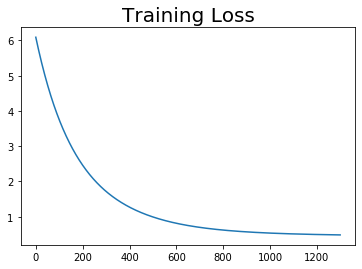

In [61]:
plt.plot(Training_loss)
plt.title('Training Loss', fontsize = 20)
plt.show()

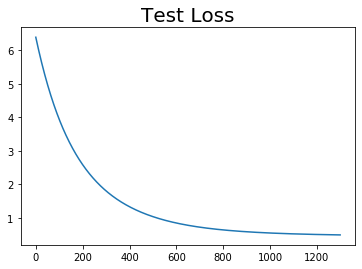

In [62]:
plt.plot(Test_loss)
plt.title('Test Loss', fontsize = 20)
plt.show()

# Saving the Model

In [64]:
saver = tf.compat.v1.train.Saver()
saver.save(sess,'classification_models/Bank.ckpt')

'classification_models/Bank.ckpt'

# Loading the model

In [95]:
with tf.compat.v1.Session() as ses:
    saver = tf.compat.v1.train.import_meta_graph('/home/admin1/Tensorflow/classification_models/Bank.ckpt.meta')
    model = saver.restore(ses, tf.train.latest_checkpoint('/home/admin1/Tensorflow/classification_models/'))
    
    graph = tf.compat.v1.get_default_graph()
    input_x = graph.get_tensor_by_name("x:0")
    input_y = graph.get_tensor_by_name("y:0")
    
    output = graph.get_tensor_by_name("output:0")
    
    
    feed_dict = {input_x: x_test}
    predictions = output.eval(feed_dict = feed_dict)
    print(predictions)

INFO:tensorflow:Restoring parameters from /home/admin1/Tensorflow/classification_models/Bank.ckpt
[[ 0.3154085 ]
 [-0.3620269 ]
 [ 0.33404416]
 ...
 [ 0.05480286]
 [ 1.3814437 ]
 [ 0.03914966]]


In [96]:
type(predictions)

numpy.ndarray

In [97]:
len(predictions)

2000

# Predicting for one input value

In [98]:
a = X[500]

In [99]:
a

array([ 0.        ,  1.        , -0.98841507,  1.        , -0.66001848,
        4.        , -1.22584767,  2.        ,  1.        ,  1.        ,
       -0.79440693])

In [100]:
a.shape

(11,)

In [102]:
a = np.reshape(a, (1, 11))

In [103]:
a.shape

(1, 11)

In [104]:
with tf.compat.v1.Session() as ses:
    saver = tf.compat.v1.train.import_meta_graph('/home/admin1/Tensorflow/classification_models/Bank.ckpt.meta')
    model = saver.restore(ses, tf.train.latest_checkpoint('/home/admin1/Tensorflow/classification_models/'))
    
    graph = tf.compat.v1.get_default_graph()
    input_x = graph.get_tensor_by_name("x:0")
    input_y = graph.get_tensor_by_name("y:0")
    
    output = graph.get_tensor_by_name("output:0")
    
    
    feed_dict = {input_x: a}
    prediction = output.eval(feed_dict = feed_dict)
    print(prediction)

INFO:tensorflow:Restoring parameters from /home/admin1/Tensorflow/classification_models/Bank.ckpt
[[-0.2529777]]
